**DATA PREPROCESSING**

https://www.kaggle.com/datasets/snehangsude/audible-dataset?select=audible_uncleaned.csv  (dataset link)

In [99]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [100]:
import pandas as pd #imported pandas as we will work on rows and columns

In [101]:
df=pd.read_csv('audible_uncleaned.csv') #importing uploaded dataset, pd.read_csv() for csv file, pd.read_json() for json file, pd.read_excel() for xlsx file

In [102]:
df.shape #gives info about the number of rows and columns

(87489, 8)

In [103]:
df.info #gives better information than shape attribute

<bound method DataFrame.info of                                              name                     author  \
0                      Geronimo Stilton #11 & #12  Writtenby:GeronimoStilton   
1                                The Burning Maze      Writtenby:RickRiordan   
2                                    The Deep End       Writtenby:JeffKinney   
3                            Daughter of the Deep      Writtenby:RickRiordan   
4      The Lightning Thief: Percy Jackson, Book 1      Writtenby:RickRiordan   
...                                           ...                        ...   
87484                   Last Days of the Bus Club     Writtenby:ChrisStewart   
87485                                    The Alps    Writtenby:StephenO'Shea   
87486                        The Innocents Abroad        Writtenby:MarkTwain   
87487                       A Sentimental Journey   Writtenby:LaurenceSterne   
87488                                      Havana    Writtenby:MarkKurlansky   

       

In [104]:
df.head()  #by default it shows top 5 entries but the number of entries can be changed by inserting the values in the function

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [105]:
df.tail(10) #complementary to head() function

,name,author,narrator,time,releasedate,language,stars,price
87479,Dear Bob and Sue,"Writtenby:MattSmith,KarenSmith","Narratedby:DavidColacci,SusanEricksen",14 hrs and 48 mins,26-12-17,English,Not rated yet,"1,055.00"
87480,Journey into Cyprus,Writtenby:ColinThubron,Narratedby:JonathanKeeble,11 hrs and 51 mins,01-01-18,English,Not rated yet,785.00
87481,The Hills of Adonis,Writtenby:ColinThubron,Narratedby:JonathanKeeble,6 hrs and 52 mins,01-12-17,English,Not rated yet,679.00
87482,The Bush,"Writtenby:DonWatson,HamishHamilton",Narratedby:DonWatson,13 hrs and 16 mins,13-10-17,English,Not rated yet,"1,328.00"
87483,We Stood upon Stars,Writtenby:RogerW.Thompson,Narratedby:JohnMcLain,5 hrs and 55 mins,02-05-17,English,Not rated yet,351.00
87484,Last Days of the Bus Club,Writtenby:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Writtenby:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Writtenby:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Writtenby:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00
87488,Havana,Writtenby:MarkKurlansky,Narratedby:FleetCooper,6 hrs and 1 min,07-03-17,English,Not rated yet,569.00


In [106]:
import matplotlib.pyplot as plt #imported this library as we will plot a piechart
%matplotlib inline

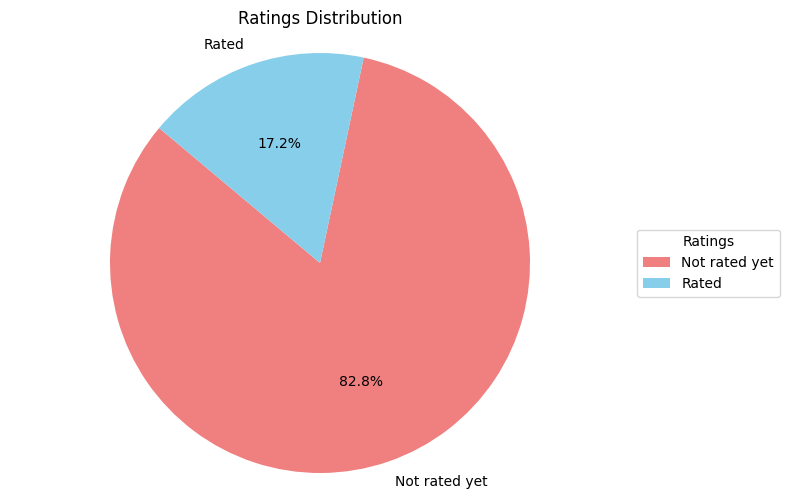

In [107]:
# Count the occurrences of each rating
rating_counts = df['stars'].value_counts()

# Count the rated and 'Not rated yet' entries
rated_count = rating_counts.drop('Not rated yet', errors='ignore').sum()
not_rated_count = rating_counts.get('Not rated yet', 0)

# Prepare data for pie chart
labels = ['Not rated yet', 'Rated']
sizes = [not_rated_count, rated_count]

# Plot the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue'])

# Add legend
ax.legend(wedges, labels, title="Ratings", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set title and equal aspect ratio
ax.set_title('Ratings Distribution')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

In [108]:
df=df[df['stars']!='Not rated yet'].reset_index(drop=True)  #to remove entries where no ratings are there

In [109]:
df.shape #to check the shape after unrated entries are omitted

(15072, 8)

In [110]:
df['stars'] = df['stars'].str.replace(r"[a-zA-Z]", '', regex=True).str.replace('  +', ' ', regex=True)  #Remove letters and extra spaces from 'stars'

df[['avgrating', 'maxrating', 'numberofratings']] = df['stars'].str.split(' ', n=2, expand=True)  #Split 'stars' into three columns: 'avgrating', 'maxrating', 'numberofratings'

df = df.drop(columns=['maxrating', 'stars'])  #Drop 'maxrating' and 'stars' columns

In [111]:
df.head() #to check if the avgrating column data got preprocessed and new column has been formed

,name,author,narrator,time,releasedate,language,price,avgrating,numberofratings
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,468.00,5,34
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,820.00,4.5,41
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,410.00,4.5,38
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,615.00,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,820.00,4.5,181


In [112]:
df['author'] = df['author'].str.replace('Writtenby:', '', regex=False)  #removing the string 'Writtenby:' in author column 

df['narrator'] = df['narrator'].str.replace('Narratedby:', '', regex=False) #removing the string 'Narratedby:' in narrator column


In [113]:
df.tail() #checking if the proper changes in narrator and author column took place

,name,author,narrator,time,releasedate,language,price,avgrating,numberofratings
15067,Why We Fly,EvanRail,EvanRail,56 mins,23-06-14,English,100.00,5,1
15068,River Town,PeterHessler,PeterBerkrot,14 hrs and 36 mins,04-05-10,English,836.00,5,1
15069,Figures in a Landscape,PaulTheroux,EdoardoBallerini,16 hrs and 44 mins,07-06-18,English,949.00,4,1
15070,Tower of London,iMinds,AbbeyHolmes,8 mins,23-12-09,English,33.00,5,1
15071,Tigers in the Snow,PeterMatthiessen,GeorgeGuidall,4 hrs and 54 mins,05-08-04,English,702.00,5,1


In [114]:
df.rename(columns={'name':'Name','author':'Author','narrator':'Narrator','time':'Duration','language':'Language','price':'Price','avgrating':'Average rating','numberofratings':'Number of ratings','releasedate':'Release date'},inplace=True)
#renaming every column for proper presentation

In [115]:
# Convert the 'Release Date' column to default datetime format
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

C:\Users\user\AppData\Local\Temp\ipykernel_9564\4044579650.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')


In [116]:
df.tail() #checking the changes applied

,Name,Author,Narrator,Duration,Release date,Language,Price,Average rating,Number of ratings
15067,Why We Fly,EvanRail,EvanRail,56 mins,2014-06-23,English,100.00,5,1
15068,River Town,PeterHessler,PeterBerkrot,14 hrs and 36 mins,2010-04-05,English,836.00,5,1
15069,Figures in a Landscape,PaulTheroux,EdoardoBallerini,16 hrs and 44 mins,2018-07-06,English,949.00,4,1
15070,Tower of London,iMinds,AbbeyHolmes,8 mins,2009-12-23,English,33.00,5,1
15071,Tigers in the Snow,PeterMatthiessen,GeorgeGuidall,4 hrs and 54 mins,2004-05-08,English,702.00,5,1


In [117]:
import re #importing regular expression library

In [118]:
#Function to convert Duration to minutes
def convert_to_minutes(duration):
    hours = 0
    minutes = 0
    
    # Extract hours and minutes
    hours_match = re.search(r'(\d+)\s*hrs?', duration)
    minutes_match = re.search(r'(\d+)\s*mins?', duration)
    
    if hours_match:
        hours = int(hours_match.group(1))
    if minutes_match:
        minutes = int(minutes_match.group(1))
    
    total_minutes = hours * 60 + minutes
    return total_minutes


In [119]:
df['Duration'] = df['Duration'].apply(convert_to_minutes) #applying the function to convert the Duration column data into minutes

In [120]:
df.head()

,Name,Author,Narrator,Duration,Release date,Language,Price,Average rating,Number of ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-04-08,English,468.00,5,34
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-01-05,English,820.00,4.5,41
2,The Deep End,JeffKinney,DanRussell,123,2020-06-11,English,410.00,4.5,38
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021-05-10,English,615.00,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,820.00,4.5,181


In [121]:
df.rename(columns={'Duration':'Duration in minutes'},inplace=True) #renaming the column to remove ambiguity

In [122]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') #converting the 'Price' column data into float by coercing if necessary to handle errors

In [123]:
df['Price'] = df['Price'].fillna(0).astype(int) #converting 'Price' column to integers, handling necessary errors

In [124]:
df.tail() #checking the dataframe after applying the changes

,Name,Author,Narrator,Duration in minutes,Release date,Language,Price,Average rating,Number of ratings
15067,Why We Fly,EvanRail,EvanRail,56,2014-06-23,English,100,5,1
15068,River Town,PeterHessler,PeterBerkrot,876,2010-04-05,English,836,5,1
15069,Figures in a Landscape,PaulTheroux,EdoardoBallerini,1004,2018-07-06,English,949,4,1
15070,Tower of London,iMinds,AbbeyHolmes,8,2009-12-23,English,33,5,1
15071,Tigers in the Snow,PeterMatthiessen,GeorgeGuidall,294,2004-05-08,English,702,5,1


In [125]:
# Save the DataFrame to a CSV file
csv_file_path = 'Audible_clean_dataset.csv'
df.to_csv(csv_file_path, index=False)

In [126]:
from IPython.display import FileLink #FileLink is a utility from IPython that creates a clickable link to a file in your Jupyter Notebook. 

# Display the download link
FileLink(csv_file_path)

C:\Users\user\Audible_clean_dataset.csv

**EXPLANATORY DATA ANALYSIS (EDA)**

In [127]:
import numpy as np #to deal with statistical parameters

In [128]:
#function to display statistical measurements for future use
def describe_series(series):
    description = series.describe()
    mode = series.mode()[0]
    std_dev = series.std()
    var = series.var()
    quartiles = series.quantile([0.25, 0.5, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]

    summary = {
        'Count': description['count'],
        'Mean': description['mean'],
        'Variance':var,
        'Standard Deviation': std_dev,
        'Minimum': description['min'],
        '25% (Q1)': quartiles[0.25],
        '50% (Median)': quartiles[0.5],
        '75% (Q3)': quartiles[0.75],
        'Maximum': description['max'],
        'Mode': mode,
        'Inter Quartile Range': iqr
    }
    return pd.Series(summary)

**Finding most frequently appearing Author**

In [129]:
modes = df['Author'].mode()
if len(modes) > 1:
    print(f"There are multiple modes: {', '.join(modes)}")
else:
    print(f"The maximum number of books are written by {modes[0]}")

The maximum number of books are written by P.G.Wodehouse


**Finding most frequently appearing Narrator**

In [130]:
modes = df['Narrator'].mode()

if len(modes) > 1:
    print(f"There are multiple modes: {', '.join(modes)}")
else:
    print(f"The maximum number of books are narrated by {modes[0]}")

The maximum number of books are narrated by SeanPratt


**Comparing similarity between Author and Narrator column**

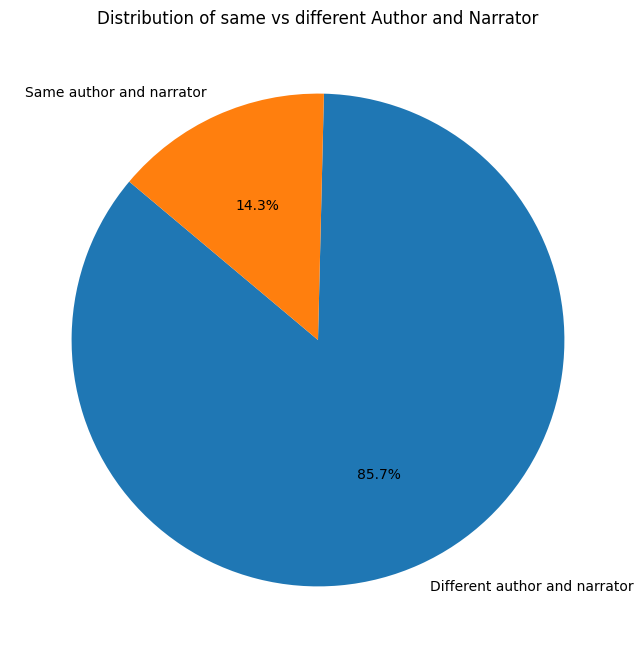

In [131]:
# Check where Author and Narrator are the same
df['Same Author and Narrator'] = df['Author'] == df['Narrator']

# Counting the number of same and different values
same_count = df['Same Author and Narrator'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(same_count, labels=['Different author and narrator', 'Same author and narrator'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of same vs different Author and Narrator')
plt.show()

In [132]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [133]:
import plotly.graph_objects as go  #to plot graphs
import seaborn as sns

**Analyzing Price column**

In [134]:
#Finding 5-number theory and other values
summary = describe_series(df['Price'])
print(summary)

Count                   15072.000000
Mean                      487.675292
Variance                94691.505333
Standard Deviation        307.719849
Minimum                     0.000000
25% (Q1)                  233.000000
50% (Median)              585.000000
75% (Q3)                  703.000000
Maximum                   999.000000
Mode                        0.000000
Inter Quartile Range      470.000000
dtype: float64


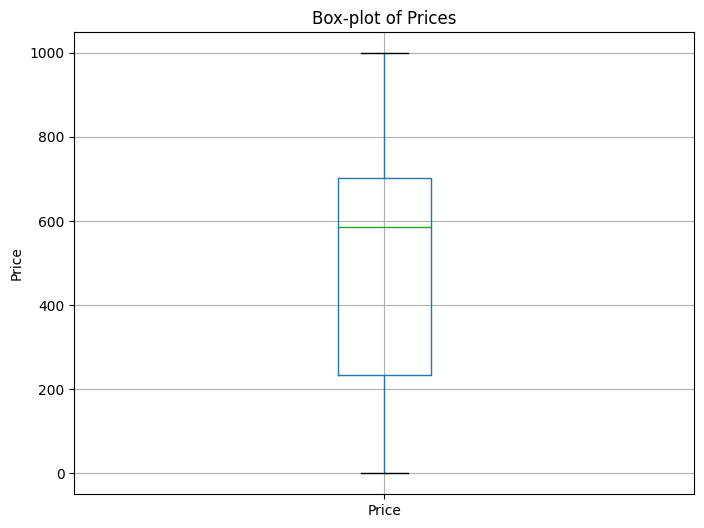

In [135]:
# Plot the boxplot for the Price column
plt.figure(figsize=(8, 6))
boxplot = df.boxplot(column=['Price'])
plt.title('Box-plot of Prices')
plt.ylabel('Price')

# Calculate the IQR and determine the outliers
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR))]

for index, row in outliers.iterrows():
    plt.text(1.05, row['Price'], row['Price'], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.show()

As we can see, the box-plot has unequal whiskers, which is quite expected as most of the books will have a minimum cost, irrespective of its quality, units sold etc. Also, there are no outliers, meaning that not a single book is exceptionally cheap or expensive in comparison to every other book.

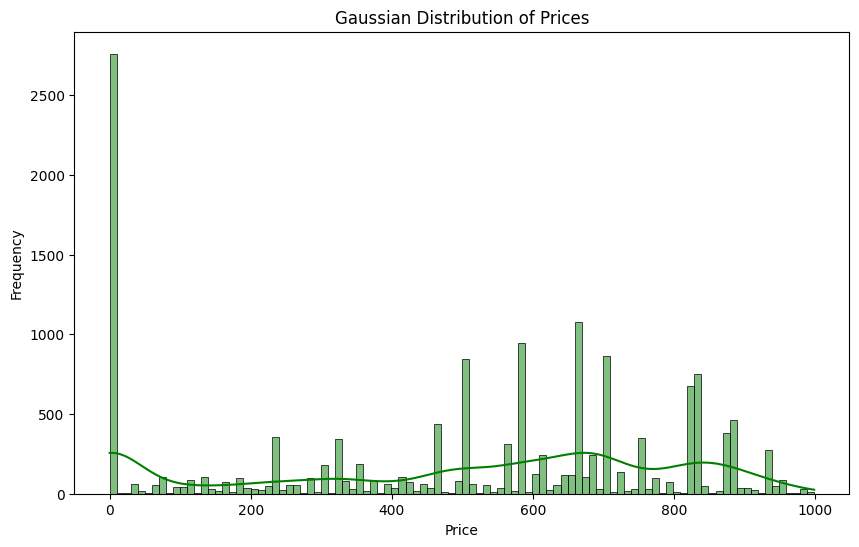

In [136]:
# Plotting the Gaussian distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=100, color='green', edgecolor='black')

# Add title and labels
plt.title('Gaussian Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show plot
plt.show()

The histogram also gives similar results just like the box-plot, where most books are in the price range of 600-800

**Analyzing Duration in minutes column**

In [137]:
summary = describe_series(df['Duration in minutes'])
print(summary)

Count                    15072.000000
Mean                       549.968617
Variance                199546.355660
Standard Deviation         446.706118
Minimum                      1.000000
25% (Q1)                   301.000000
50% (Median)               476.000000
75% (Q3)                   673.000000
Maximum                   8595.000000
Mode                       417.000000
Inter Quartile Range       372.000000
dtype: float64


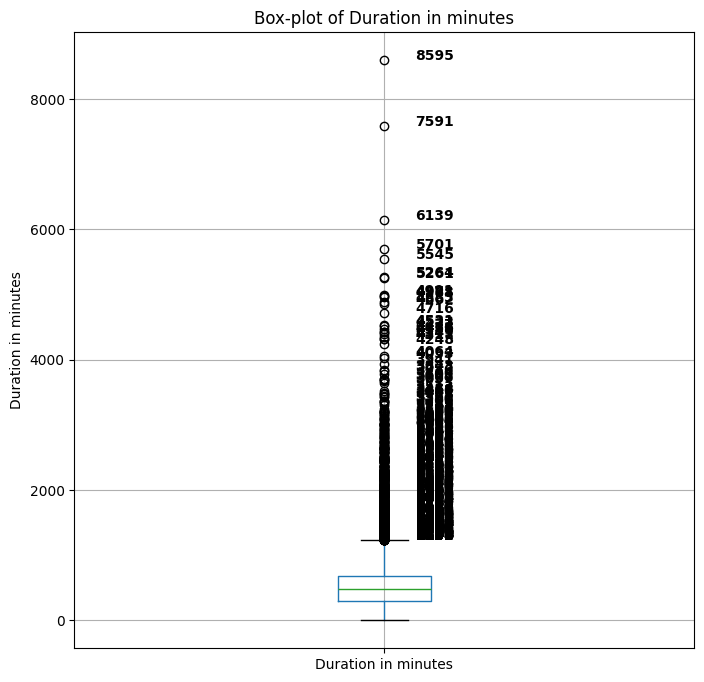

In [138]:
# Plot the boxplot for Duration in minutes column
plt.figure(figsize=(8, 8))
boxplot = df.boxplot(column=['Duration in minutes'])
plt.title('Box-plot of Duration in minutes')
plt.ylabel('Duration in minutes')

# Annotate the outliers
# Calculate the IQR and determine the outliers
Q1 = df['Duration in minutes'].quantile(0.25)
Q3 = df['Duration in minutes'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Duration in minutes'] < (Q1 - 1.5 * IQR)) | (df['Duration in minutes'] > (Q3 + 1.5 * IQR))]

for index, row in outliers.iterrows():
    plt.text(1.05, row['Duration in minutes'], row['Duration in minutes'], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.show()

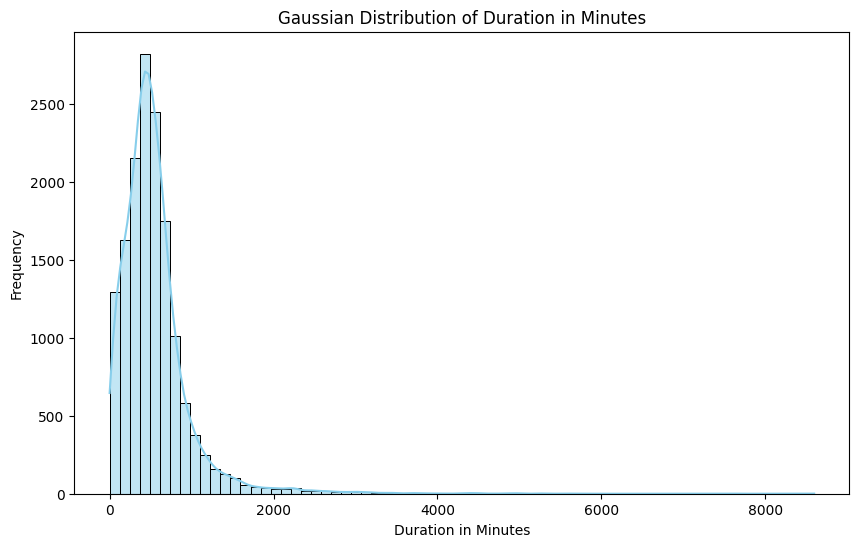

In [139]:
# Plotting the Gaussian distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration in minutes'], kde=True, bins=70, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Gaussian Distribution of Duration in Minutes')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')

# Show plot
plt.show()

**Analyzing Language column**

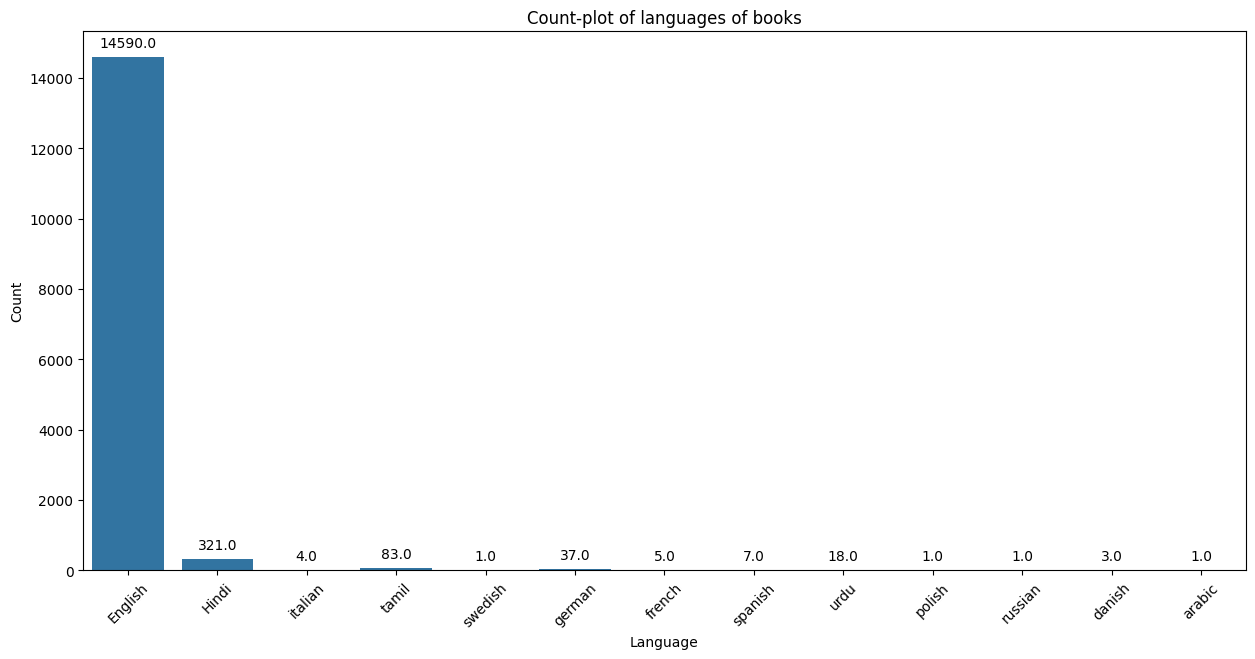

In [140]:
# Plot the countplot for the language column
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=df, x='Language')
plt.title('Count-plot of languages of books')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels if needed

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

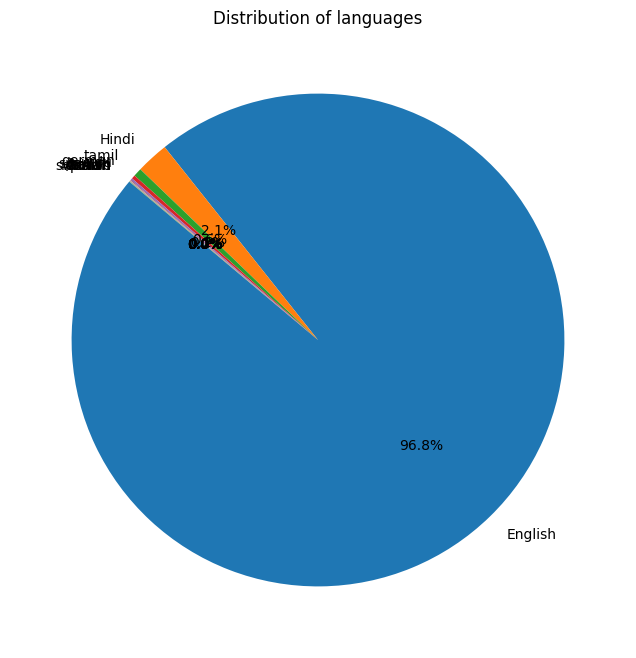

In [141]:
#Plotting pie-chart for distribution of languages
# Count the occurrences of each rating
rating_counts = df['Language'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of languages')
plt.show()

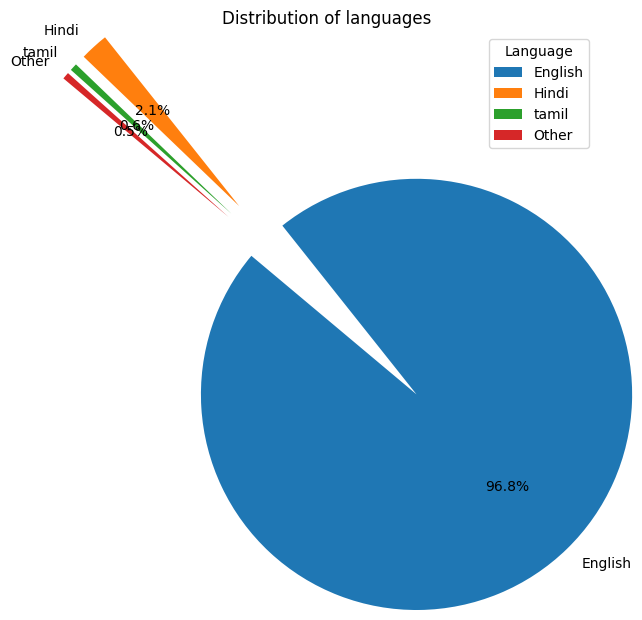

In [142]:
# Count the occurrences of each rating
rating_counts = df['Language'].value_counts()

# Aggregate smaller categories into "Other" if necessary
threshold = 80  # Combine ratings with counts less than or equal to this threshold
other_count = rating_counts[rating_counts <= threshold].sum()
rating_counts = rating_counts[rating_counts > threshold]
rating_counts['Other'] = other_count

# Plot the pie chart
plt.figure(figsize=(7, 7))
explode = (0.6,) * len(rating_counts)  # Explode all slices a little for better visibility
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of languages')
plt.legend(rating_counts.index, title='Language', bbox_to_anchor=(1, 1))
plt.show()

Here we have clubbed some languages together and have also applied spacing to give a clearer understanding without any clumsiness

**Analyzing Average rating column**

In [145]:
df.head()


,Name,Author,Narrator,Duration in minutes,Release date,Language,Price,Average rating,Number of ratings,Same Author and Narrator
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-04-08,English,468,5,34,False
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-01-05,English,820,4.5,41,False
2,The Deep End,JeffKinney,DanRussell,123,2020-06-11,English,410,4.5,38,False
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021-05-10,English,615,4.5,12,False
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,820,4.5,181,False


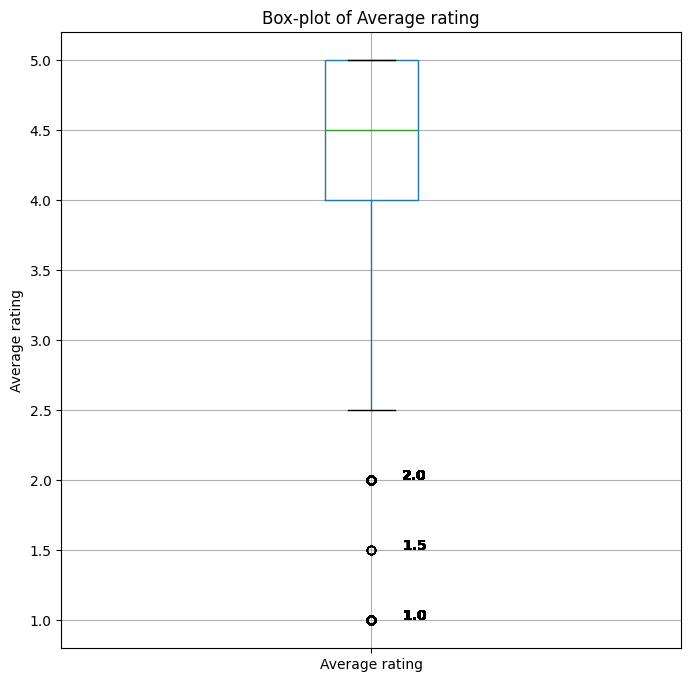

In [150]:
# Plot the boxplot for Average rating
plt.figure(figsize=(8, 8))
boxplot = df.boxplot(column=['Average rating'])
plt.title('Box-plot of Average rating')
plt.ylabel('Average rating')

# Annotate the outliers
# Calculate the IQR and determine the outliers
Q1 = df['Average rating'].quantile(0.25)
Q3 = df['Average rating'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Average rating'] < (Q1 - 1.5 * IQR)) | (df['Average rating'] > (Q3 + 1.5 * IQR))]

for index, row in outliers.iterrows():
    plt.text(1.05, row['Average rating'], row['Average rating'], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.show()

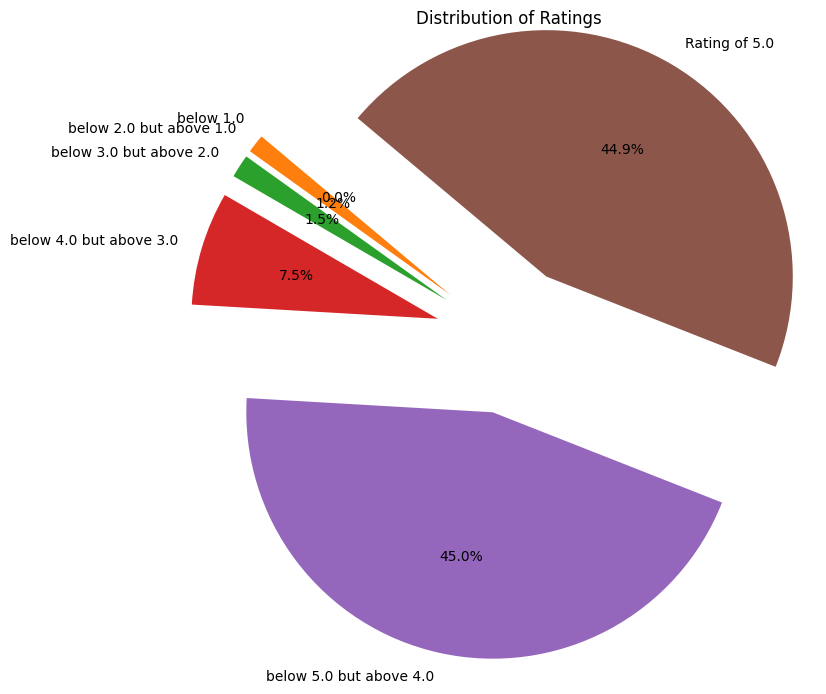

In [147]:
#Plotting pie-chart for average ratings
# Ensure the 'Average rating' column is of numerical type
df['Average rating'] = pd.to_numeric(df['Average rating'], errors='coerce')

# Define conditions for categorizing the ratings
conditions = [
    (df['Average rating'] < 1),
    (df['Average rating'] < 2),
    (df['Average rating'] < 3),
    (df['Average rating'] < 4),
    (df['Average rating'] < 5),
    (df['Average rating'] == 5)
]

# Define the corresponding choices for each condition
choices = [
    'below 1.0',
    'below 2.0 but above 1.0',
    'below 3.0 but above 2.0',
    'below 4.0 but above 3.0',
    'below 5.0 but above 4.0',
    'Rating of 5.0'
]

# Categorize the ratings based on conditions and choices
df['Category'] = pd.cut(
    df['Average rating'], 
    bins=[-float('inf'), 1, 2, 3, 4, 5, float('inf')], 
    labels=choices, 
    right=False
)

# Count the number of ratings in each category
category_counts = df['Category'].value_counts(sort=False)

# Define explode to separate slices
explode = [0.3] * len(category_counts)  # Adjust explosion for each slice

# Plotting the pie chart
plt.figure(figsize=(8, 8))

plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode
)

plt.title('Distribution of Ratings')
plt.show()

**Analyzing Release date column**

In [148]:
# Convert 'Release date' column to datetime
df['Release date'] = pd.to_datetime(df['Release date'])

# Compute five-number summary (Standard Deviation and Variance are not compatible with date datatype)
min_date = df['Release date'].min()
q1_date = df['Release date'].quantile(0.25)
median_date = df['Release date'].median()
q3_date = df['Release date'].quantile(0.75)
max_date = df['Release date'].max()

# Print the five-number summary
print("Five-number summary for Release date:")
print(f"Minimum: {min_date}")
print(f"First Quartile (Q1): {q1_date}")
print(f"Median: {median_date}")
print(f"Third Quartile (Q3): {q3_date}")
print(f"Maximum: {max_date}")

Five-number summary for Release date:
Minimum: 1998-12-27 00:00:00
First Quartile (Q1): 2014-09-28 06:00:00
Median: 2018-06-14 00:00:00
Third Quartile (Q3): 2020-04-16 06:00:00
Maximum: 2022-12-03 00:00:00


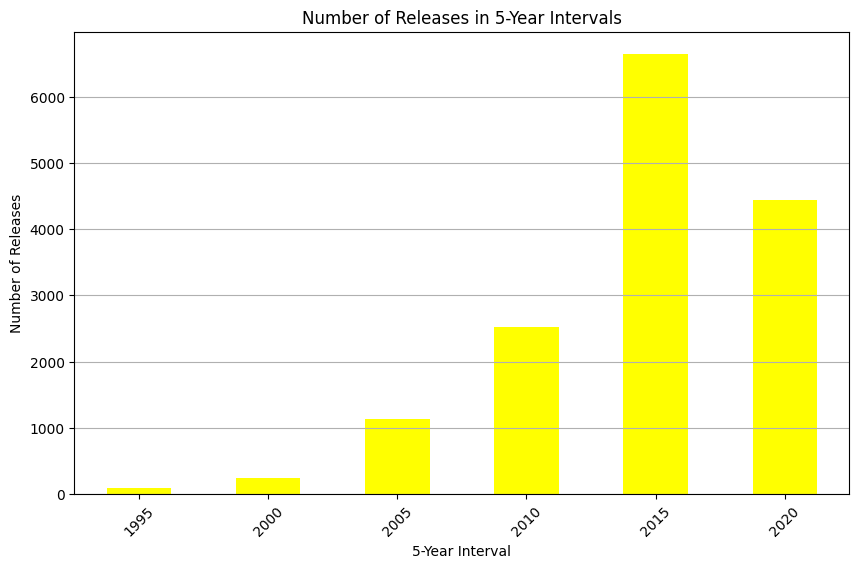

In [149]:
#Plotting bar-graph for number of releases in year intervals
# Create a new column for 5-year intervals
df['5-Year Interval'] = (df['Release date'].dt.year // 5) * 5

# Group by the 5-year intervals and count the number of entries
interval_counts = df['5-Year Interval'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
interval_counts.plot(kind='bar', color='yellow')
plt.xlabel('5-Year Interval')
plt.ylabel('Number of Releases')
plt.title('Number of Releases in 5-Year Intervals')
plt.xticks(rotation=45)
plt.grid(axis='y')
# Show the plot
plt.show()

As we can see in the processed dataset, it had books with the highest number of releases in 2015, followed by 2020, and least releases in 1995